<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tamato 


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import os
os.chdir('/content/drive/My Drive/PlantVillage')
os.getcwd()

'/content/drive/My Drive/PlantVillage'

### Datasets and Pre Processing

In [0]:
import keras
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
x=[]
y=[]
path='/content/drive/My Drive/PlantVillage/Tomato__Target_Spot'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(0)
path='/content/drive/My Drive/PlantVillage/Tomato__Tomato_mosaic_virus'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(1)
x=np.array(x)
y=np.array(y)

In [0]:
from sklearn.utils import shuffle
(x,y)=shuffle(x,y)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [8]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1190, 256, 256, 3)
(1190,)
(587, 256, 256, 3)
(587,)
4
float32
4
float32
4
float32


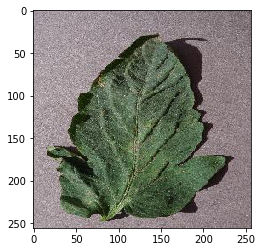

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

1190
256
256


In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [11]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1 1
0 0
0.45963797
0.18802649
2.873861 2.873861
-2.4445384 -2.4445384


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],256,256,3)
xtest =  xtest.reshape(xtest.shape[0],256,256,3)

In [13]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[1. 0.]


### LeNet Model

In [0]:
import keras
from keras import models
from keras import layers

In [28]:
model = models.Sequential()

model.add(layers.Conv2D(25, (10,10), input_shape=(256,256,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(16, (2,2),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(5, (6,6),activation='relu', strides=(7,7), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(5, (2,2),activation='relu', strides=(2,2), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))


model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 247, 247, 25)      7525      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 123, 123, 25)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 122, 122, 16)      1616      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 5)           2885      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 4, 4, 5)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 5)          

### Visualization of randomly initialized filters

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=100,epochs=20, verbose=1)

Train on 952 samples, validate on 238 samples
Epoch 1/20
952/952 [==============================] - 4s 5ms/step - loss: 0.1029 - acc: 0.9580 - val_loss: 0.1255 - val_acc: 0.9412
Epoch 2/20
952/952 [==============================] - 2s 2ms/step - loss: 0.0993 - acc: 0.9643 - val_loss: 0.1095 - val_acc: 0.9538
Epoch 3/20
952/952 [==============================] - 2s 2ms/step - loss: 0.0977 - acc: 0.9653 - val_loss: 0.1091 - val_acc: 0.9538
Epoch 4/20
952/952 [==============================] - 2s 2ms/step - loss: 0.0927 - acc: 0.9653 - val_loss: 0.1030 - val_acc: 0.9580
Epoch 5/20
952/952 [==============================] - 2s 2ms/step - loss: 0.0954 - acc: 0.9643 - val_loss: 0.1102 - val_acc: 0.9496
Epoch 6/20
952/952 [==============================] - 2s 2ms/step - loss: 0.0914 - acc: 0.9674 - val_loss: 0.1013 - val_acc: 0.9622
Epoch 7/20
952/952 [==============================] - 2s 2ms/step - loss: 0.0912 - acc: 0.9674 - val_loss: 0.2374 - val_acc: 0.9118
Epoch 8/20
952/952 [==========

### Evaluate

In [32]:
model.evaluate(xtest,ytest)

587/587 [==============================] - 1s 1ms/step


[0.16388405189933525, 0.9505962521294719]

### Prediction

In [0]:
pred=model.predict(xtest[0].reshape(1,256,256,3))
print(pred)
print(pred.argmax())

[[2.2204618e-04 9.9977797e-01]]
1


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

587/587 [==============================] - 1s 3ms/step
0.0033678299461029713
1.0


### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

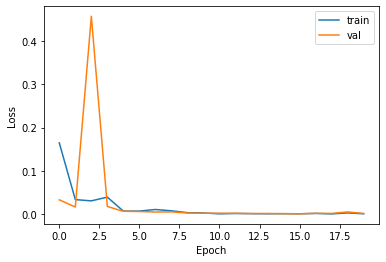

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

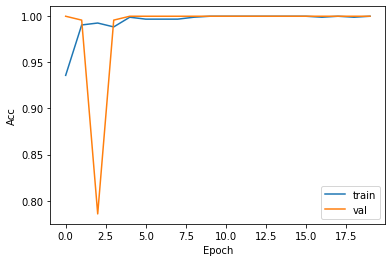

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 256, 256, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [1. 0.] Predicted is 0
3 Actual is  [1. 0.] Predicted is 0
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [1. 0.] Predicted is 0
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [1. 0.] Predicted is 0


In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       477
     class 1       1.00      1.00      1.00       110

    accuracy                           1.00       587
   macro avg       1.00      1.00      1.00       587
weighted avg       1.00      1.00      1.00       587



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[477   0]
 [  0 110]]


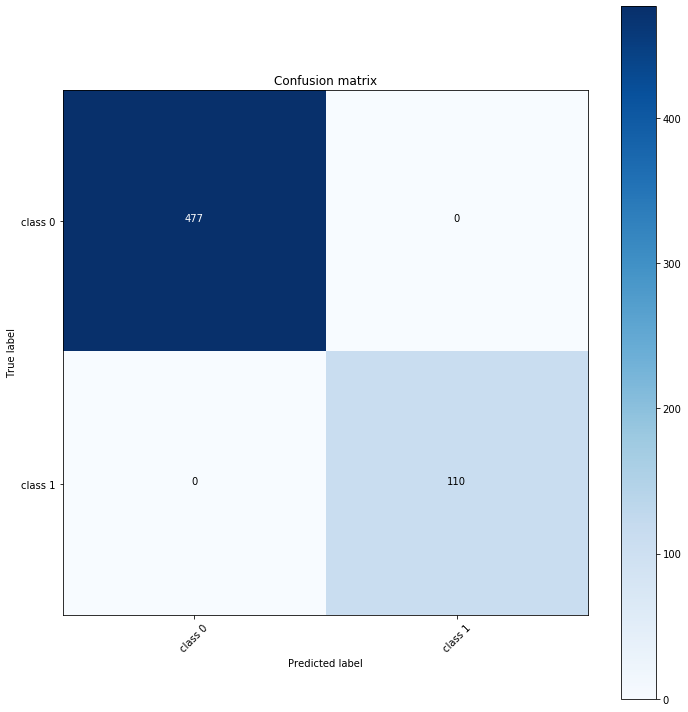

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [0]:
for layer in model.layers:
  print(layer)

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,256,256,3))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

NameError: ignored

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

NameError: ignored

(1, 62, 62, 96)


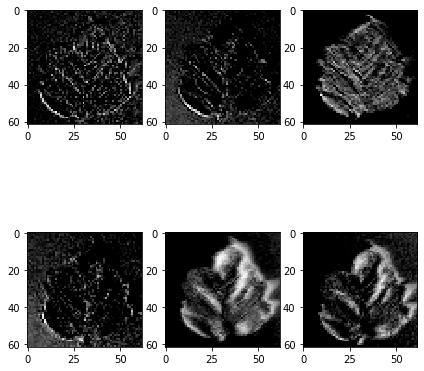

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

(1, 31, 31, 96)


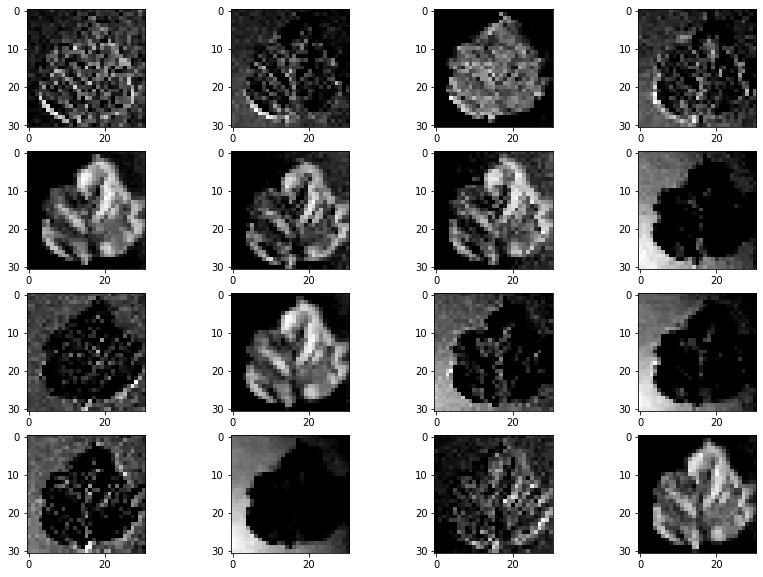

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

(1, 21, 21, 256)


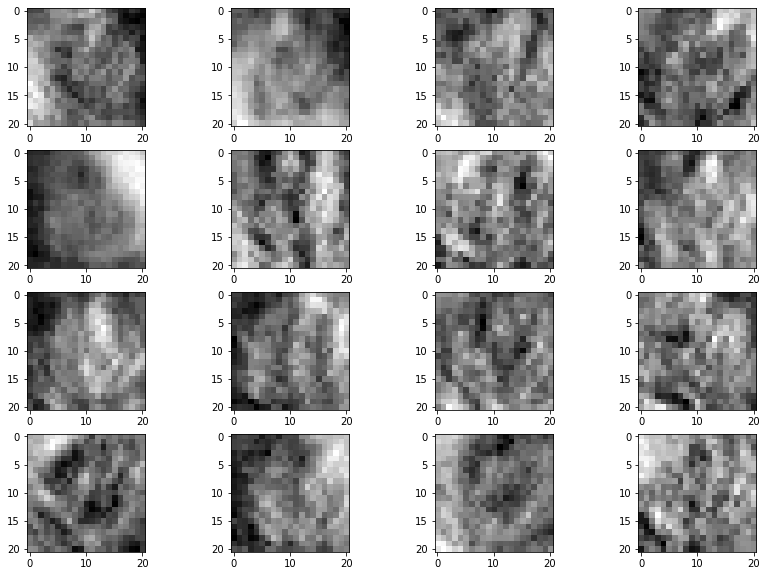

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

ValueError: ignored

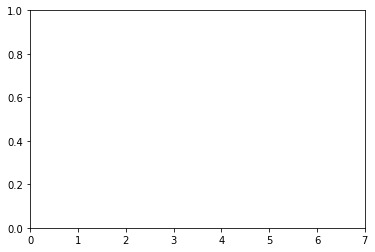

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

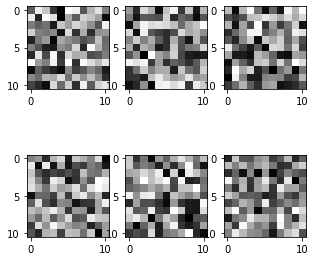

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])